# Filtering using Python

scikit-image and SciPy contain a large number of image filtering functions. In this exercise, we will explore some of the fundamental functions and touch upon more advanced filters as well.

## Filtering using correlation

We will start by exploring the basic correlation operator from SciPy. Start by importing:

```python
from scipy.ndimage import correlate
```

Now create a small and simple image:

```python
input_img = np.arange(25).reshape(5, 5)
print(input_img)
```

and a simple filter:
```python
weights = [[0, 1, 0],
		   [1, 2, 1],
		   [0, 1, 0]]

```

Now we can correlate the image with the weights:

```python
res_img = correlate(input_img, weights)
```

In [19]:
from scipy.ndimage import correlate
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from IPython.display import Image
import skimage
from skimage import io

In [14]:
input_img = np.arange(25).reshape(5, 5)
print("Input image:")
print(input_img)

weights = [[0, 1, 0],
		   [1, 2, 1],
		   [0, 1, 0]]

res_img = correlate(input_img, weights)
print("Weighted image:")
print(res_img)

Input image:
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]
Weighted image:
[[  6  11  17  23  28]
 [ 31  36  42  48  53]
 [ 61  66  72  78  83]
 [ 91  96 102 108 113]
 [116 121 127 133 138]]


### Exercise 1
Print the value in position (3, 3) in `res_img`. Explain the value.

In [12]:
res_img[3,3]
# This is the result of the weighted sum of the center pixel and its neighbors. 36+19+17+23+13 = 108

108

## Border handling 


When the value of an output pixel at the boundary of the image is
computed, a portion of the filter is usually outside the edge of the
input image. One way to handle this, is to assume that the value of the
  *off-the-edge pixels* of the image are 0. This is called zero
padding. Since 0 is the value of a black pixel, the output image will
have a dark edge. Another approach is to *reflect* the actual pixel values of the image to the *off-the-edge-pixel*. This is the default behaviour of `correlate`. We can also set the *off-the-edge-pixel* to have a constant value (for example 10) by:

```python
res_img = correlate(input_img, weights, mode="constant", cval=10)
```

### Exercise 2

Compare the output images when using `reflection` and `constant` for the border. Where and why do you see the differences.

In [18]:
ref_img = correlate(input_img, weights, mode='reflect')
print("Reflection image:")
print(ref_img)

con_img = correlate(input_img, weights, mode='constant')
print("Constant image:")
print(con_img)


Reflection image:
[[  6  11  17  23  28]
 [ 31  36  42  48  53]
 [ 61  66  72  78  83]
 [ 91  96 102 108 113]
 [116 121 127 133 138]]
Constant image:
[[  6  10  15  20  20]
 [ 26  36  42  48  44]
 [ 51  66  72  78  69]
 [ 76  96 102 108  94]
 [ 76 100 105 110  90]]


### Reflect mode
This mode reflects the input image at the boundaries. For instance, if you're processing the left edge, the values just outside the image boundary are a reflection of the values just inside the boundary.

### Constant mode
This mode pads the input image with a constant value (default is 0). When the filter overlaps this area, it will be correlating with that constant value.

### Exercise 3

Read and show the image **Gaussian.png** from the [exercise material](https://github.com/RasmusRPaulsen/DTUImageAnalysis/blob/main/exercises/ex4-ImageFiltering/data/).

Create a mean filter with normalized weights:
```python
size = 5
# Two dimensional filter filled with 1
weights = np.ones([size, size])
# Normalize weights
weights = weights / np.sum(weights)
```

Use `correlate` with the **Gaussian.png** image and the mean filter. Show the resulting image together with the input image. What do you observe?

Try to change the size of the filter to 10, 20, 40 etc.. What do you see?

What happens to the noise and what happens to the places in image where there are transitions from light to dark areas?

## Median filtering

The median filter belongs to the group of *rank filters* where the pixel values in a given area are sorted by value and then one of the values are picked. Here the median value of the sorted values.

Start by importing the filter:

```python
from skimage.filters import median
```

We can create a *footprint* which marks the size of the median filter and do the filtering like this:
```python
size = 5
footprint = np.ones([size, size])
med_img = median(im_org, footprint)

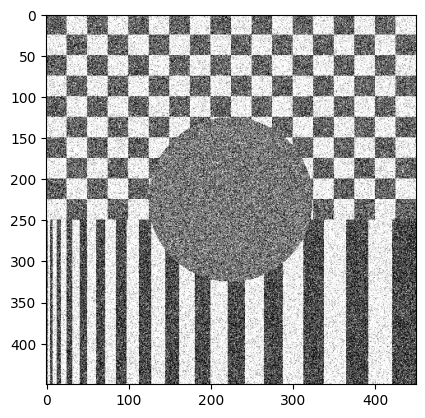

In [46]:
img = io.imread('data/Gaussian.png', as_gray=True)

plt.imshow(img, cmap='gray')
plt.show()

In [47]:
print(img.shape)

(450, 450)


In [48]:
size = 5
# Two dimensional filter filled with 1
weights = np.ones([size, size])
# Normalize weights
weights = weights / np.sum(weights)

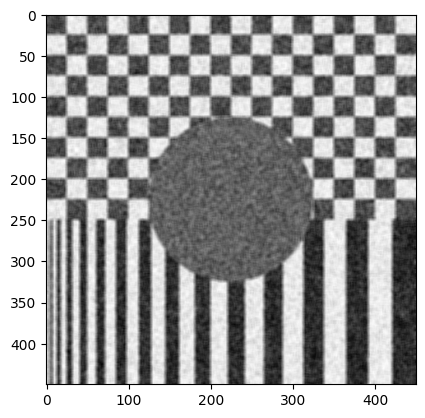

In [49]:
# Apply filter
res_img = correlate(img, weights)
# Show image
plt.imshow(res_img, cmap='gray')
plt.show()

The filtedefined is known as a "box" or "mean" filter. Specifically a 5x5 box filter.

Definition: The filter, weights, is a 5x5 matrix filled with 1s. This matrix is then normalized, so each element of weights is 1/25 or 0.04.

Functionality: When this filter is applied (using correlation or convolution) to an image, it replaces each pixel value with the average of its surrounding pixels (within the 5x5 window). The center of the filter aligns with the pixel being processed, and the surrounding values in the 5x5 window contribute to the new pixel value based on their weight in the filter.

Effect: The effect of this operation on the image is smoothing or blurring. It's a simple low-pass filter that attenuates high-frequency content (like sharp edges or noise) by averaging over local neighborhoods. Essentially, each pixel's value is "smoothed out" by taking into account the values of its neighbors.

Use Cases: This kind of filter is often used for basic image blurring, noise reduction, or when you want to obtain a "rough" representation of an image without the finer details.

In essence, by applying this filter, you're taking the mean of every 5x5 patch in the image, which results in a blurred version of the original image.

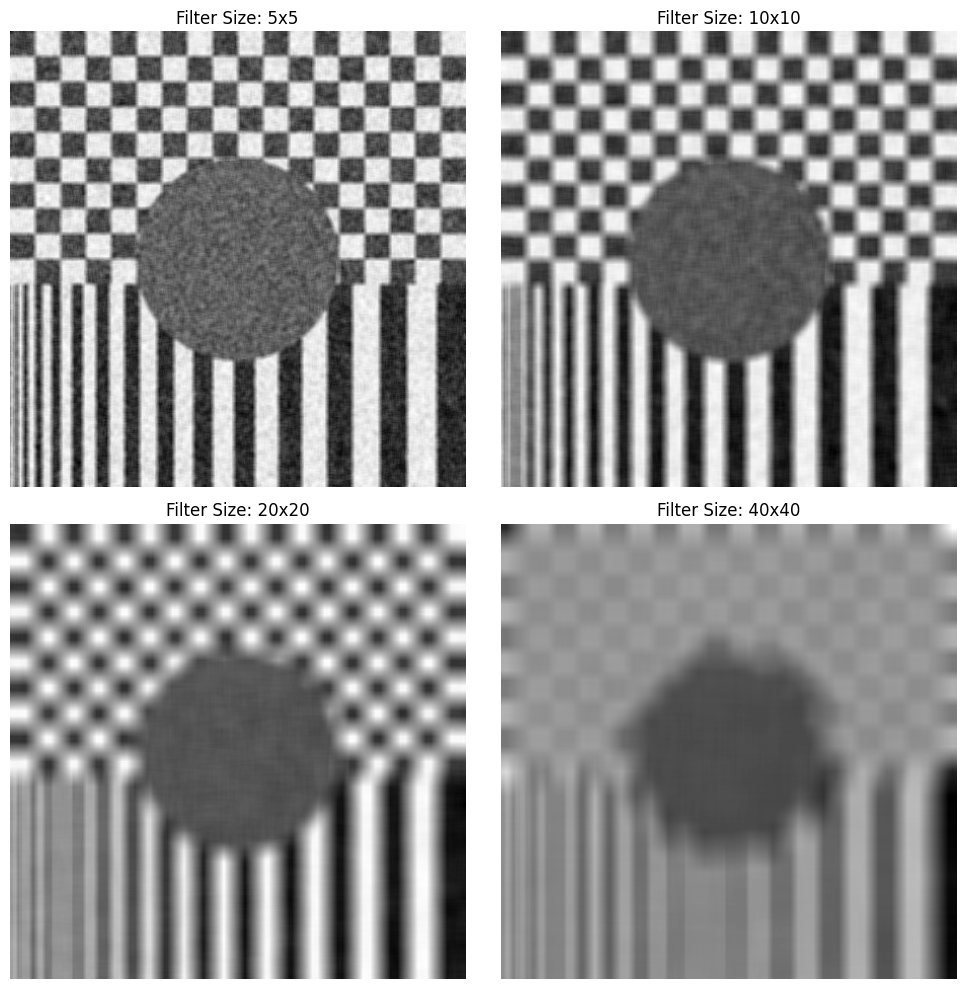

In [50]:
sizes = [5, 10, 20, 40]

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Loop over each size and subplot axis to apply the filter and display the result
for ax, size in zip(axes.ravel(), sizes):
    # Two dimensional filter filled with 1
    weights = np.ones((size, size))
    # Normalize weights
    weights /= np.sum(weights)
    # Apply filter
    res_img = correlate(img, weights)
    # Display result on the corresponding subplot
    ax.imshow(res_img, cmap='gray')
    ax.set_title(f'Filter Size: {size}x{size}')
    ax.axis('off')  # Hide axis for clarity

plt.tight_layout()
plt.show()


## Median filtering

The median filter belongs to the group of *rank filters* where the pixel values in a given area are sorted by value and then one of the values are picked. Here the median value of the sorted values.

Start by importing the filter:

```python
from skimage.filters import median
```

We can create a *footprint* which marks the size of the median filter and do the filtering like this:
```python
size = 5
footprint = np.ones([size, size])
med_img = median(im_org, footprint)
```

### Exercise 4

Filter the **Gaussian.png** image with the median filter with different size (5, 10, 20...). What do you observe? What happens with the noise and with the lighth-dark transitions?

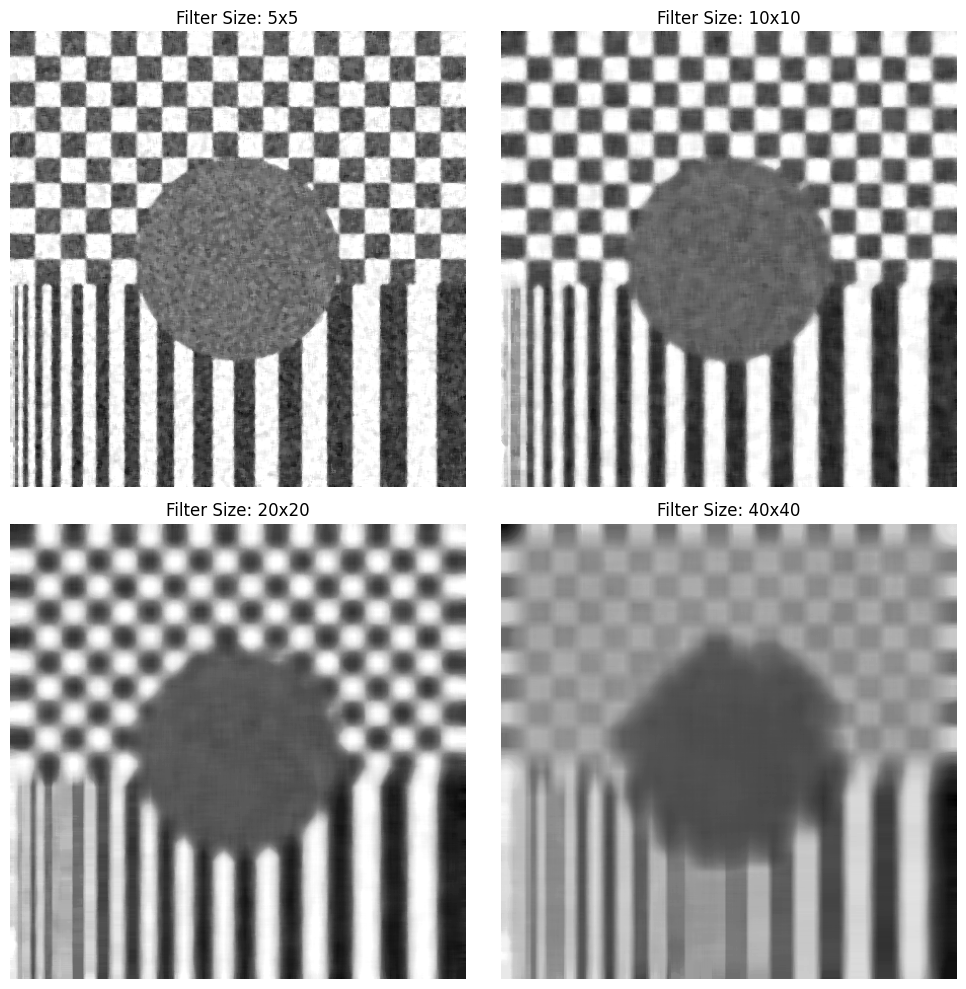

In [54]:
from skimage.filters import median
sizes = [5, 10, 20, 40]

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Loop over each size and subplot axis to apply the filter and display the result
for ax, size in zip(axes.ravel(), sizes):
    # Two dimensional filter filled with 1
    weights = np.ones((size, size))
    # Normalize weights
    weights /= np.sum(weights)
    # Apply filter
    res_img = median(img, weights)
    # Display result on the corresponding subplot
    ax.imshow(res_img, cmap='gray')
    ax.set_title(f'Filter Size: {size}x{size}')
    ax.axis('off')  # Hide axis for clarity

plt.tight_layout()
plt.show()

The mean (or box) filter and the median filter are both spatial filters that work in local neighborhoods of pixels, but they perform different operations:

Mean (Box) Filter: This calculates the average of all pixels in the defined neighborhood. For instance, with a 5x5 box filter, the value of each pixel in the output image is set to the average of the corresponding 5x5 neighborhood in the input image.

Median Filter: This calculates the median of all pixels in the defined neighborhood. So, for a 5x5 neighborhood, it sorts the 25 values and picks the middle one.

For certain images and especially for larger filter sizes, the results of the two filters can indeed look very similar, especially if there are not many sharp pixel-to-pixel variations (high-frequency changes) within the neighborhoods. Both filters are smoothing filters and suppress high-frequency noise. However, the median filter is particularly good at removing "salt and pepper" noise (random black and white pixels) without blurring edges too much.

Where the difference between the two filters will become particularly evident is in their handling of noise and edges:

Noise: As mentioned, the median filter is excellent for removing salt-and-pepper noise. While the mean filter will blur this noise, the median filter can remove it more effectively without blurring other parts of the image.

Edges: Median filters tend to preserve edges better than mean filters. If there's a sharp edge in the image, the mean filter will blur it, but the median filter might preserve it a bit better.

For the images you've tested on, if they're relatively uniform or don't have the types of noise where median filtering excels, then the results might indeed look very similar. Try applying both filters on an image with salt-and-pepper noise or sharp edges to see more pronounced differences.

## Comparing mean and median filtering

Try to load and show the **SaltPepper.png** image. This image has noise consist of very dark or very light pixels.

### Exercise 5

Try to use your mean and median filter with different filter sizes on the **SaltPepper.png**. What do you observe? Can they remove the noise and what happens to the image?

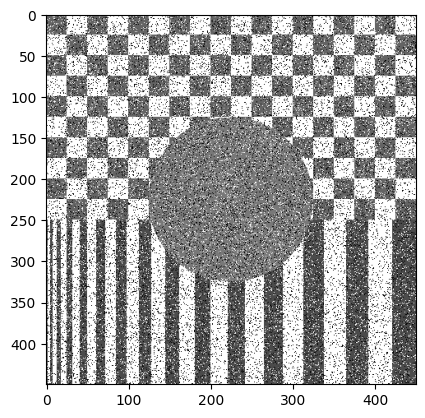

In [60]:
img = io.imread('data/SaltPepper.png', as_gray=True)

plt.imshow(img, cmap='gray')
plt.show()

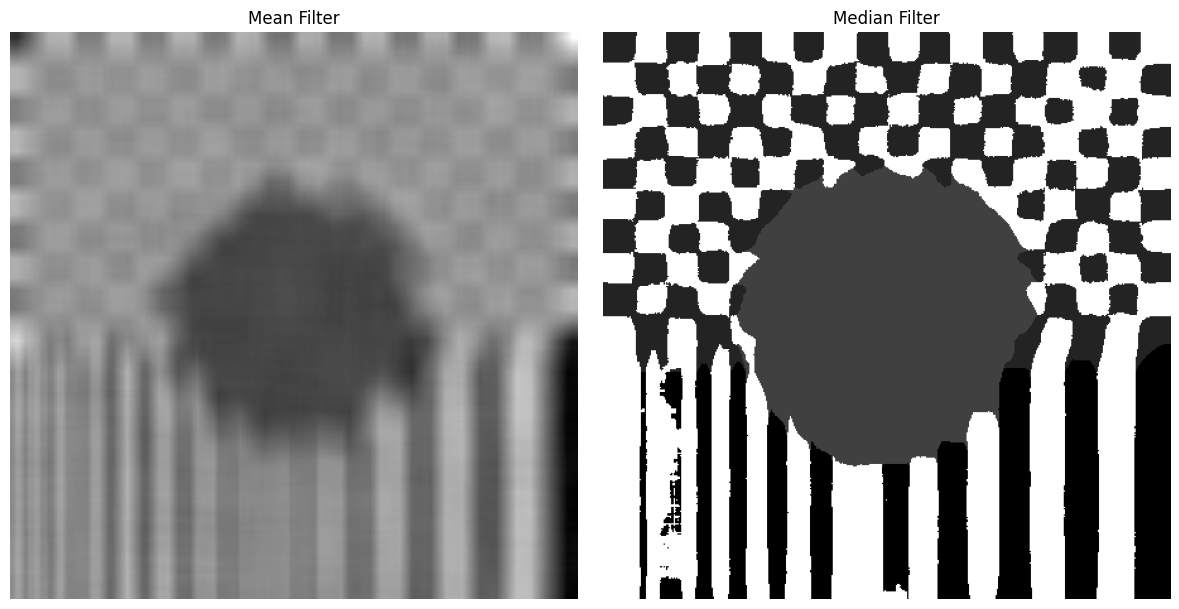

In [62]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Using Mean Filter
res_mean_img = correlate(img, weights)
axes[0].imshow(res_mean_img, cmap='gray')
axes[0].set_title('Mean Filter')
axes[0].axis('off')  # Hide axis for clarity

# Using Median Filter
res_median_img = median(img, weights)
axes[1].imshow(res_median_img, cmap='gray')
axes[1].set_title('Median Filter')
axes[1].axis('off')  # Hide axis for clarity

plt.tight_layout()
plt.show()

## Gaussian filter

Scikit-image contains many [different filters](https://scikit-image.org/docs/stable/api/skimage.filters.html).

The Gaussian filter is widely used in image processing. It is a
smoothing filter that removes high frequencies from the image.


### Exercise 6
Let us try the Gaussian filter on the **Gaussian.png** image. Start by importing the filter:

```python
from skimage.filters import gaussian
```

and do the filtering:

```python
sigma = 1
gauss_img = gaussian(im_org, sigma)
```

Try to change the `sigma` value and observe the result.

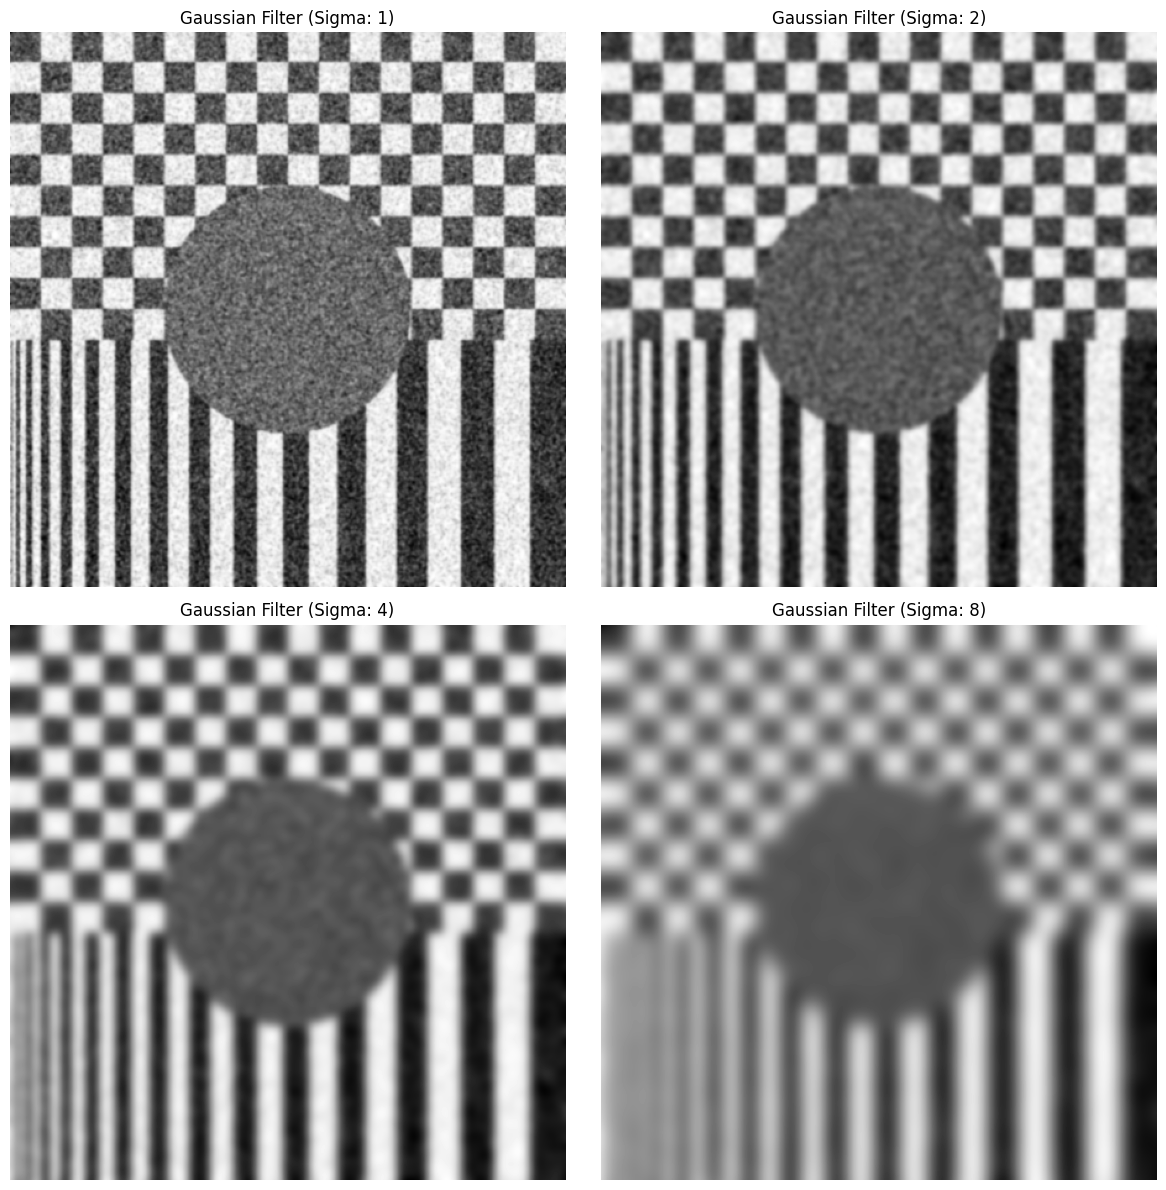

In [63]:
from skimage.filters import gaussian

img = io.imread('data/Gaussian.png', as_gray=True)

# Define different sigma values
sigmas = [1, 2, 4, 8]

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Loop over each sigma and subplot axis to apply the Gaussian filter and display the result
for ax, sigma in zip(axes.ravel(), sigmas):
    gauss_img = gaussian(img, sigma=sigma)
    ax.imshow(gauss_img, cmap='gray')
    ax.set_title(f'Gaussian Filter (Sigma: {sigma})')
    ax.axis('off')  # Hide axis for clarity

plt.tight_layout()
plt.show()

### Exercise 7

Use one of your images (or use the **car.png** image) to try the above filters. Especially, try with large filter kernels (larger than 10) with the median and the Gaussian filter. Remember to transform your image into gray-scale before filtering.

What is the visual difference between in the output? Try to observe places where there is clear light-dark transition.

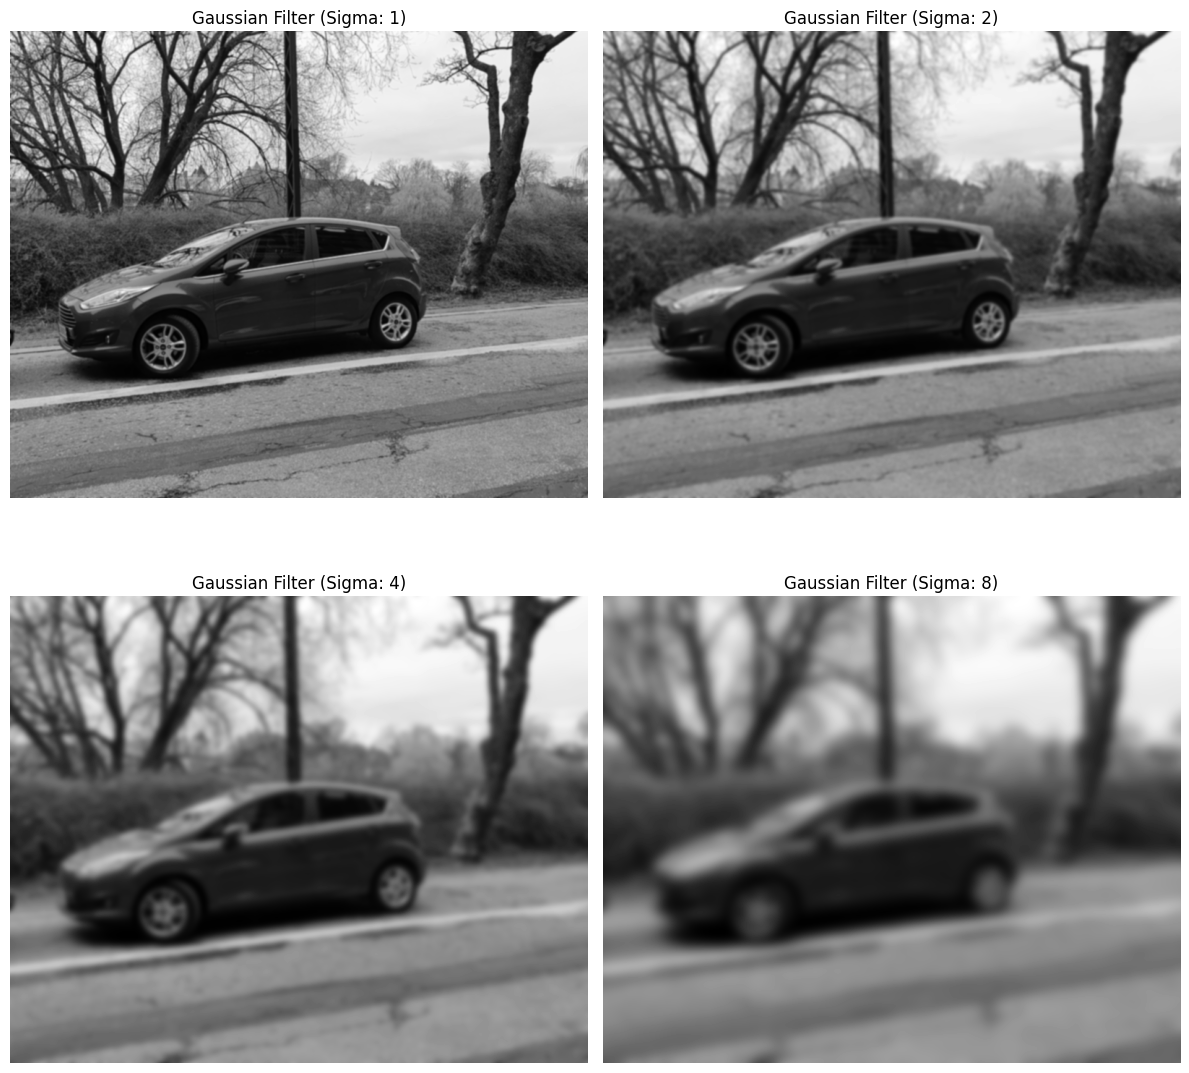

In [64]:
car = io.imread('data/car.png', as_gray=True)

# Define different sigma values
sigmas = [1, 2, 4, 8]

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Loop over each sigma and subplot axis to apply the Gaussian filter and display the result
for ax, sigma in zip(axes.ravel(), sigmas):
    gauss_car = gaussian(car, sigma=sigma)
    ax.imshow(gauss_car, cmap='gray')
    ax.set_title(f'Gaussian Filter (Sigma: {sigma})')
    ax.axis('off')  # Hide axis for clarity

plt.tight_layout()
plt.show()

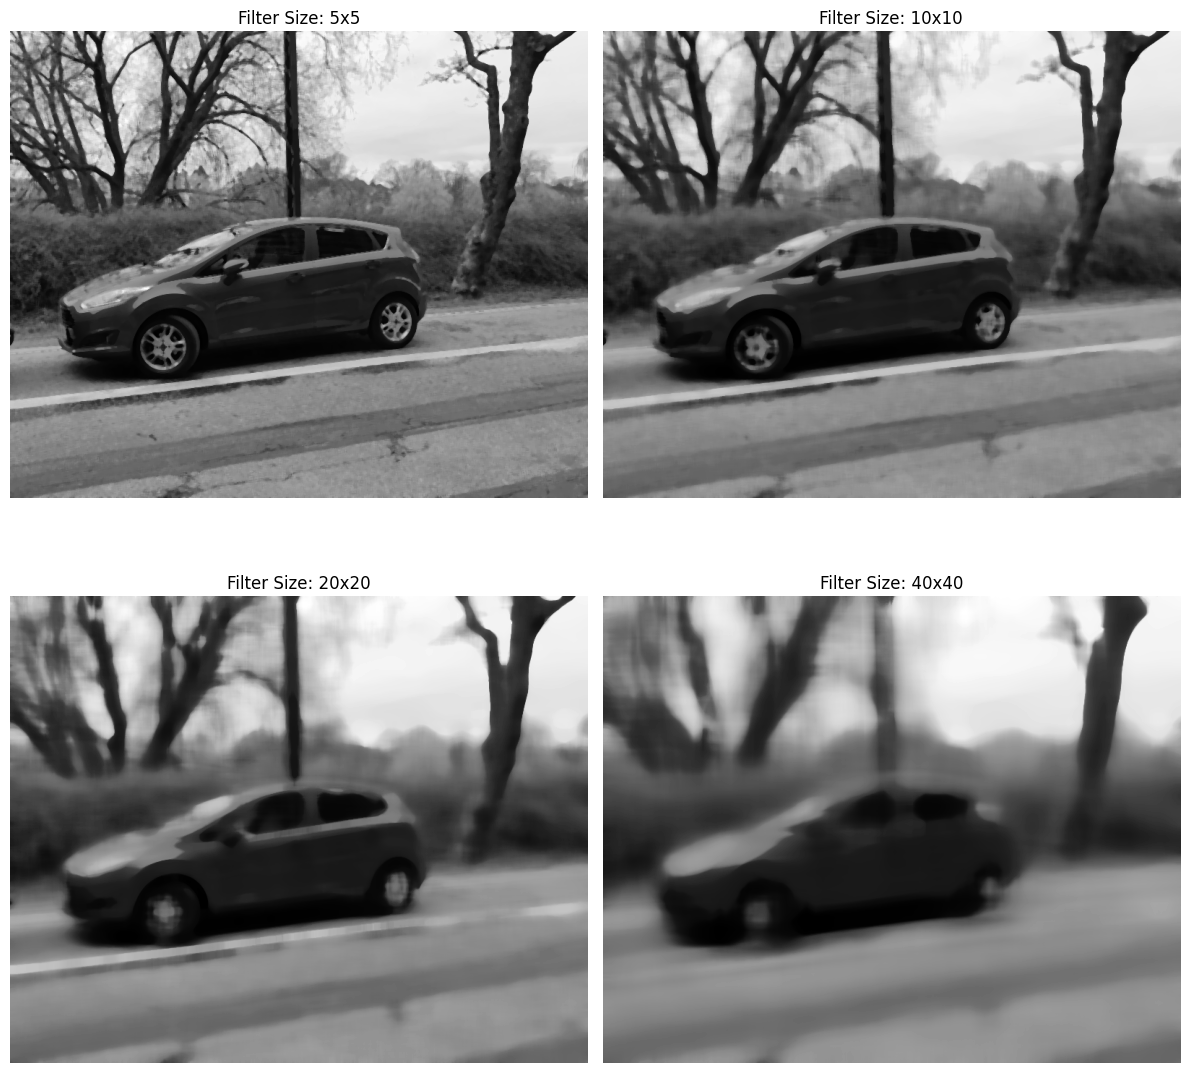

In [66]:
# Define different size values
sizes = [5, 10, 20, 40]

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Loop over each size and subplot axis to apply the Median filter and display the result
for ax, size in zip(axes.ravel(), sizes):
    # Two dimensional filter filled with 1
    weights = np.ones((size, size))
    # Normalize weights
    weights /= np.sum(weights)
    # Apply filter
    med_car = median(car, weights)
    # Display result on the corresponding subplot
    ax.imshow(med_car, cmap='gray')
    ax.set_title(f'Filter Size: {size}x{size}')
    ax.axis('off')  # Hide axis for clarity

plt.tight_layout()
plt.show()

## Edge filters

In image analysis, an *edge* is where there is a large transition from light pixels to dark pixels. It means that there is a *high pixel value gradient* at an edge. Since objects in an image are often of a different color than the background, the outline of the object can sometimes be found where there are edges in the image. It is therefore interesting to apply filters that can estimate the gradients in the image and using them to detect edges.

The **Prewitt filter** is a simple gradient estimation filter. The Python version of the Prewitt filter can estimate the horizontal gradient using the `prewitt_h` filter, the vertical gradient with the `prewitt_v` filter and the *magnitude of the edges* using the `prewitt` filter. The magnitude is computed as

$$V(x, y) = \sqrt{(P_v^2 + P_h^2)} \enspace , $$

where $P_v$ and $P_h$ are the outputs of the vertical and horizontal Prewitt filters.

Start by importing the filter:

```python
from skimage.filters import prewitt_h
from skimage.filters import prewitt_v
from skimage.filters import prewitt
```

### Exercise 8

Try to filter the **donald_1.png** photo with the `prewitt_h` and `prewitt_v` filters and show the output without converting the output to unsigned byte. Notice that the output range is [-1, 1]. Try to explain what features of the image that gets high and low values when using the two filters?

In [67]:
from skimage.filters import prewitt_h, prewitt_v, prewitt

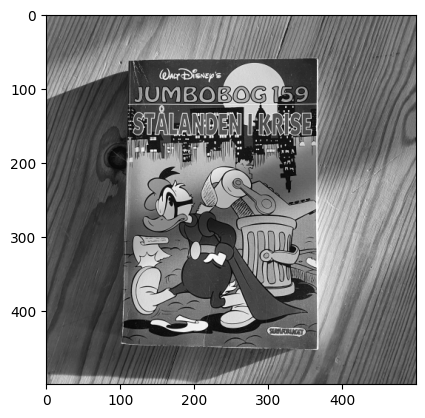

In [70]:
donald = io.imread('data/donald_1.png', as_gray=True)

plt.imshow(donald, cmap='gray')
plt.show()

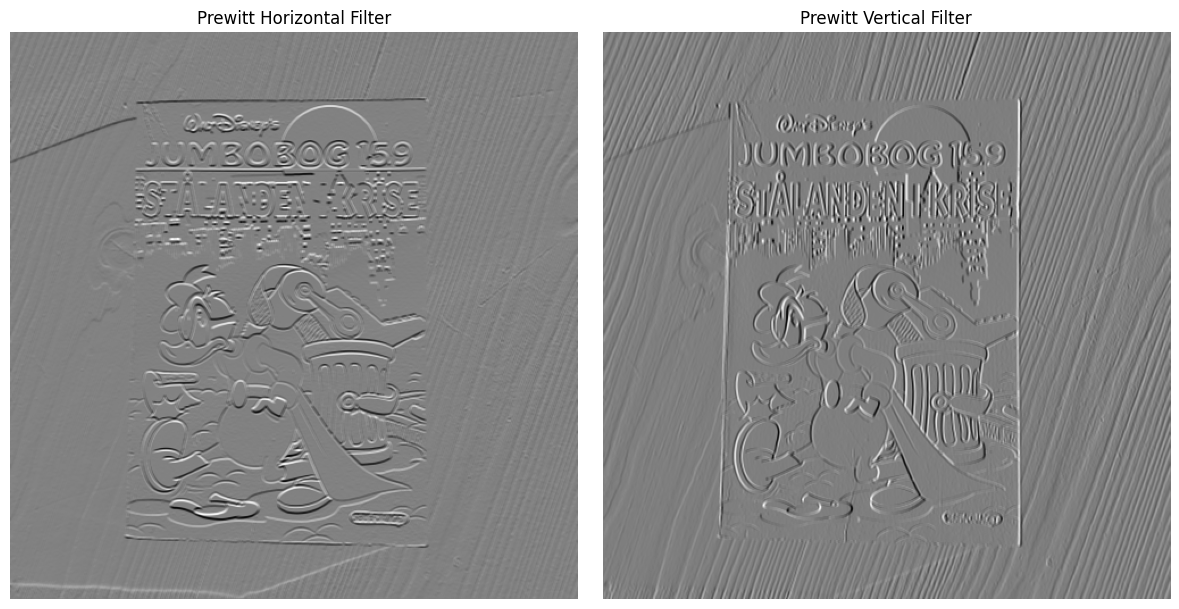

In [74]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Using Prewitt_h Filter
prewitt_h_img = prewitt_h(donald)
axes[0].imshow(prewitt_h_img, cmap='gray')
axes[0].set_title('Prewitt Horizontal Filter')
axes[0].axis('off')  # Hide axis for clarity

# Using Prewitt_v Filter
prewitt_v_img = prewitt_v(donald)
axes[1].imshow(prewitt_v_img, cmap='gray')
axes[1].set_title('Prewitt Vertical Filter')
axes[1].axis('off')  # Hide axis for clarity

plt.tight_layout()
plt.show()

### Exercise 9

Use the `prewitt` filter on **donald_1.png**. What do you see?

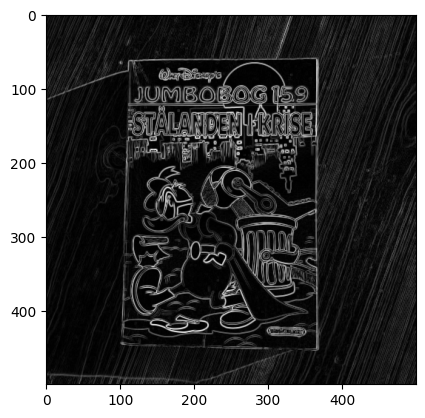

In [75]:
# Using Prewitt_h Filter
prewitt_img = prewitt(donald)

plt.imshow(prewitt_img, cmap='gray')
plt.show()

## Edge detection in medical images

The **ElbowCTSlice.png** image is one slice of a CT scan of an elbow from a person that climbed, wanted to show off, fell, landed on his arm and fractured a bone. 


### Exercise 10

The goal of this exercise is to detect the edges that seperates the bone from the soft 
tissue and the edges that separates the elbow from the background. Your detection algorithm should follow this outline:

- Read the CT image
- Filter the image using either a Gaussian filter or a median filter
- Compute the gradients in the filtered image using a Prewitt filter
- Use Otsu's thresholding method to compute a threshold, T,  in the gradient image
- Apply the threshold, T, to the gradient image to create a binary image.

The final binary should contain the edges we are looking for. It will probably contain noise as well. We will explore methods to remove this noise later in the course.

You should experiment and find out:

- Does the median or Gaussian filter give the best result?
- Should you use both the median and the Gaussian filter?
- What filter size gives the best result?
- What sigma in the Gaussian filter gives the best result?

**Tip:** To get a better understanding of your output, uou can use the scaled visualization and colormapping that we explored in an earlier exercise:
```python
min_val = edge_img.min()
max_val = edge_img.max()
io.imshow(edge_img, vmin=min_val, vmax=max_val, cmap="terrain")
``` 


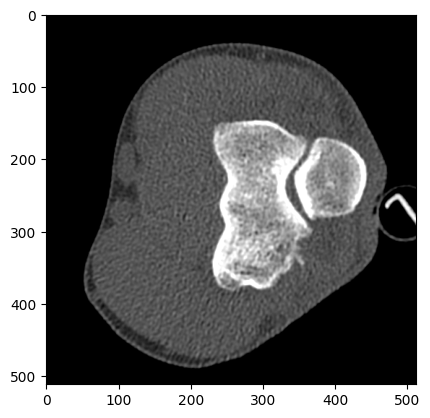

In [77]:
elbow = io.imread('data/ElbowCTSlice.png', as_gray=True)

plt.imshow(elbow, cmap='gray')
plt.show()

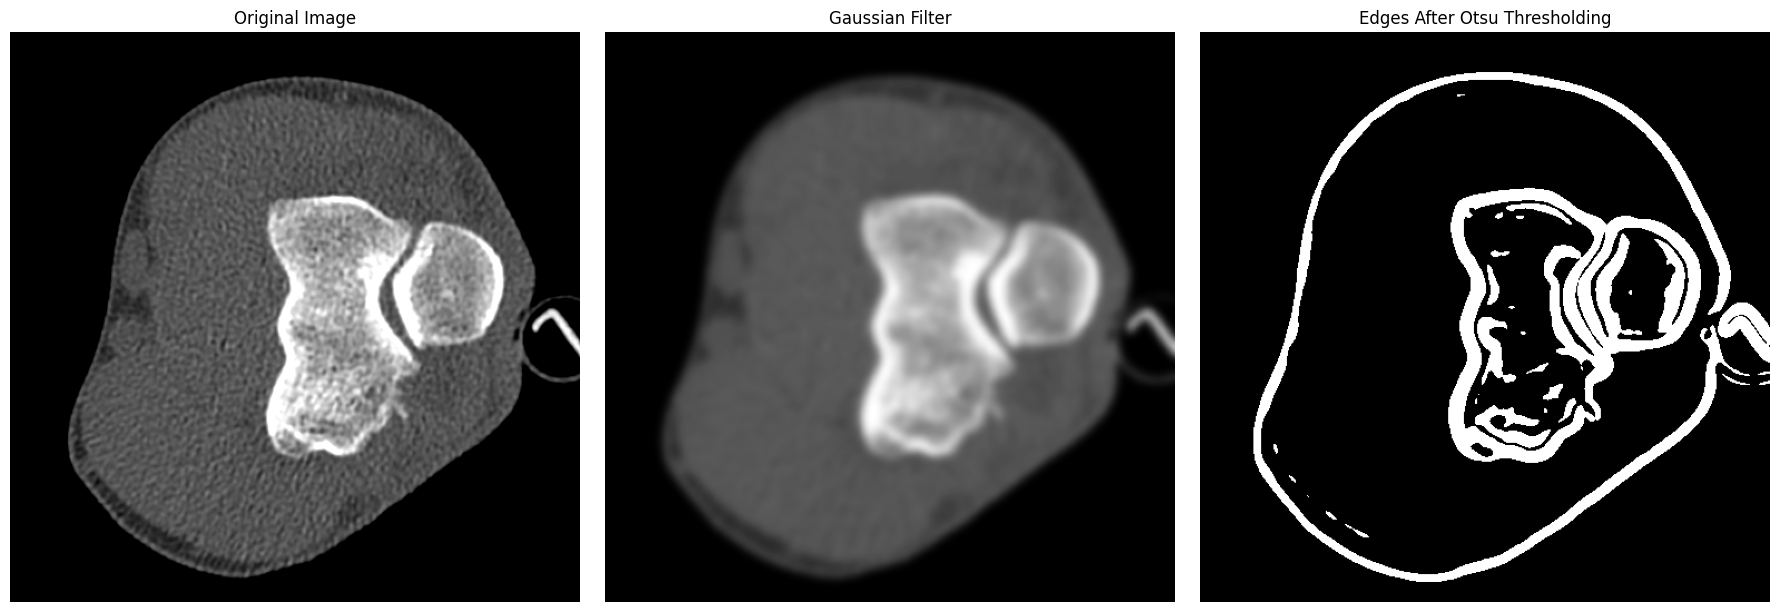

In [79]:
from skimage.filters import threshold_otsu

sigma = 4

# Apply Gaussian filter
gauss_elbow = gaussian(elbow, sigma=sigma)

# Compute the gradients using Prewitt filter
gradient_image = prewitt(gauss_elbow)

# Apply Otsu thresholding
thresh = threshold_otsu(gradient_image)
binary = gradient_image > thresh

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].imshow(elbow, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(gauss_elbow, cmap='gray')
axes[1].set_title('Gaussian Filter')
axes[1].axis('off')

axes[2].imshow(binary, cmap='gray')
axes[2].set_title('Edges After Otsu Thresholding')
axes[2].axis('off')

plt.tight_layout()
plt.show()